# Демонстрация LSTM и GRU в PyTorch

In [1]:
import torch
from torch import nn
import math

### 1. LSTM
https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

In [2]:
batch_size = 1          # Размер батча
input_size = 2          # Размерность входа (количество признаков)
hidden_size = 3         # Размерность скрытого состояния
num_layers = 1          # Количество слоев
bidirectional = False   # Двунаправленность сети
proj_size = 0           # Наличие слоя проекции

Обеспечиваем воспроизводимость результатов (https://pytorch.org/docs/stable/notes/randomness.html):

In [3]:
torch.manual_seed(0)

In [4]:
lstm = nn.LSTM(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    bias=True,
    batch_first=False,
    dropout=0,
    bidirectional=bidirectional,
    proj_size=proj_size
)
lstm

LSTM(2, 3)

Зададим функцию для вывода весов с названиями переменных:

In [5]:
def print_named_parameters(model):
    s = 0
    for parameter in model.named_parameters():
        print(f'\n{parameter[0]}: {list(parameter[1].data.size())} - {parameter[1].numel()} weights\n{parameter[1].data}')
        s += parameter[1].numel()
    print(f'\nTotal number of parameters = {s}')

Выводим все веса с названиями переменных:

In [6]:
print_named_parameters(lstm)


weight_ih_l0: [12, 2] - 24 weights
tensor([[-0.0043,  0.3097],
        [-0.4752, -0.4249],
        [-0.2224,  0.1548],
        [-0.0114,  0.4578],
        [-0.0512,  0.1528],
        [-0.1745, -0.1135],
        [-0.5516, -0.3824],
        [-0.2380,  0.0214],
        [ 0.2282,  0.3464],
        [-0.3914, -0.2514],
        [ 0.2097,  0.4794],
        [-0.1188,  0.4320]])

weight_hh_l0: [12, 3] - 36 weights
tensor([[-0.0931,  0.0611,  0.5228],
        [-0.5356, -0.3635, -0.1462],
        [-0.2251,  0.4988, -0.3742],
        [-0.2658, -0.4034, -0.5407],
        [-0.3370,  0.4963,  0.2576],
        [ 0.2798,  0.0304, -0.2960],
        [ 0.0977, -0.5391, -0.4172],
        [-0.2976,  0.3643,  0.3385],
        [-0.2561, -0.0208,  0.3693],
        [ 0.5740,  0.2291,  0.0780],
        [ 0.3871, -0.3399,  0.1076],
        [-0.4476, -0.4002, -0.2982]])

bias_ih_l0: [12] - 12 weights
tensor([ 0.2612,  0.2322, -0.3420,  0.1744,  0.3169, -0.0729,  0.0220,  0.1338,
         0.3582,  0.5544, -0.4449, 

---
Матрицы весов LSTM в PyTorch имеют следующую структуру:  

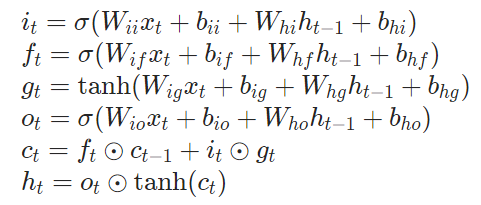

- `LSTM.weight_ih_l[k]` – веса "вход-скрытое состояние" $k$-го слоя: $(W_{ii}|W_{if}|W_{ig}|W_{io})$;  
размерность для $k=0$: (4 * `hidden_size`, `input_size`);  
размерность для $k>0$: (4 * `hidden_size`, `num_directions` * `hidden_size`).

- `LSTM.weight_hh_l[k]` – веса "скрытое состояние-скрытое состояние" $k$-го слоя: $(W_{hi}|W_{hf}|W_{hg}|W_{ho})$;  
размерность: (4 * `hidden_size`, `input_size`);  
если `proj_size` > 0, то размерность: (4 * `hidden_size`, `proj_size`).

- `LSTM.bias_ih_l[k]` – свободные коэффициенты "вход-скрытое состояние" $k$-го слоя: $(b_{ii}|b_{if}|b_{ig}|b_{io})$;  
размерность: (4 * `hidden_size`);

- `LSTM.bias_hh_l[k]` – свободные коэффициенты "скрытое состояние-скрытое состояние" $k$-го слоя: $(b_{hi}|b_{hf}|b_{hg}|b_{ho})$;  
размерность: (4 * `hidden_size`);

- `LSTM.weight_hr_l[k]` – веса проекции $k$-го слоя (только если `proj_size` > 0);  
размерность: (`proj_size`, `hidden_size`).

---
Начальные веса выбираются из равномерного распределения:

$$U\left(-\sqrt{\frac{1}{\|h\|}},\sqrt{\frac{1}{\|h\|}}\right),$$

где $\|h\|$ – размер скрытого слоя.

In [7]:
limit = math.sqrt(1/hidden_size)
print(f'U({-limit:.3f}, {limit:.3f})')

U(-0.577, 0.577)


### 2. GRU
https://pytorch.org/docs/stable/generated/torch.nn.GRU.html

In [8]:
gru = nn.GRU(
    input_size=input_size,
    hidden_size=hidden_size,
    num_layers=num_layers,
    bias=True,
    batch_first=False,
    dropout=0,
    bidirectional=bidirectional
)
gru

GRU(2, 3)

In [9]:
print_named_parameters(gru)


weight_ih_l0: [9, 2] - 18 weights
tensor([[ 0.1081, -0.0973],
        [-0.0950, -0.2643],
        [ 0.2220, -0.3420],
        [ 0.2117,  0.2920],
        [ 0.4133,  0.2159],
        [-0.5714, -0.3745],
        [ 0.2883,  0.1208],
        [-0.4504, -0.3324],
        [ 0.5431,  0.3890]])

weight_hh_l0: [9, 3] - 27 weights
tensor([[-0.2517, -0.1453, -0.5500],
        [-0.0104, -0.4348, -0.4453],
        [-0.0318,  0.0867, -0.2364],
        [ 0.3426, -0.3513,  0.5239],
        [ 0.3957, -0.4869, -0.1437],
        [ 0.0261,  0.0842,  0.1369],
        [ 0.2266,  0.0346, -0.2817],
        [ 0.2732, -0.5538, -0.3422],
        [-0.1445, -0.2812, -0.2020]])

bias_ih_l0: [9] - 9 weights
tensor([-0.4732, -0.1228,  0.1234, -0.3761, -0.0296,  0.4133, -0.0594,  0.0160,
        -0.0498])

bias_hh_l0: [9] - 9 weights
tensor([ 0.1168,  0.3671,  0.5469,  0.3666,  0.5481, -0.0418, -0.5186, -0.2737,
         0.3931])

Total number of parameters = 63
